## 讀入套件


In [26]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

## 讀入fashion_mnist數據集

In [5]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 查看數據集

In [6]:
len(x_train)

60000

In [7]:
len(y_train)

60000

In [9]:
len(x_test)

10000

In [10]:
len(y_test)

10000

Trouser


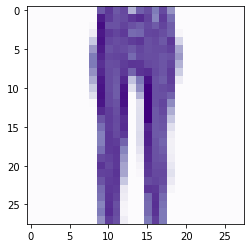

In [23]:
print(class_names[y_train[2617]])
plt.imshow(x_train[2617],cmap='Purples');

## 整理資料

In [24]:
#normalize
x_train=x_train/255
x_test=x_test/255
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
#one-hot encoding
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_train,10)

## 建立卷積神經網路與模型

In [29]:
CNNlayer=[Conv2D(32, (3, 3), padding='same', input_shape=(28, 28, 1), activation='relu'),
              MaxPool2D(pool_size = (2,2)),
              Conv2D(64, (3, 3), padding='same', activation='relu'),
              MaxPool2D(pool_size = (2,2)),
              Conv2D(128, (3, 3), padding='same', activation='relu'),
              MaxPool2D(pool_size = (2,2))]

FClayer=[Flatten(),
        Dense(units=128, activation='relu'),
        Dense(units=10, activation='softmax')]

modelfa= Sequential(CNNlayer+FClayer)


## 模型架構

In [30]:
modelfa.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0

## 組裝神經網路並訓練模型

In [33]:
modelfa.compile(loss = 'mse', optimizer = SGD(lr = 0.0617), metrics = ['accuracy'])
modelfa.fit(x_train,y_train,batch_size=200,epochs=10)


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 109s 2ms/sample - loss: 0.0854 - accuracy: 0.3399
Epoch 2/10
60000/60000 [==============================] - 105s 2ms/sample - loss: 0.0741 - accuracy: 0.4461
Epoch 3/10
60000/60000 [==============================] - 107s 2ms/sample - loss: 0.0513 - accuracy: 0.6472
Epoch 4/10
60000/60000 [==============================] - 107s 2ms/sample - loss: 0.0422 - accuracy: 0.6970
Epoch 5/10
60000/60000 [==============================] - 108s 2ms/sample - loss: 0.0392 - accuracy: 0.7157
Epoch 6/10
60000/60000 [==============================] - 106s 2ms/sample - loss: 0.0370 - accuracy: 0.7351
Epoch 7/10
60000/60000 [==============================] - 107s 2ms/sample - loss: 0.0351 - accuracy: 0.7491
Epoch 8/10
60000/60000 [==============================] - 107s 2ms/sample - loss: 0.0338 - accuracy: 0.7608
Epoch 9/10
60000/60000 [==============================] - 108s 2ms/sample - loss: 0.0327 - accuracy: 0.7702
Epoch

## 查看準確率

In [34]:
train_score = modelfa.evaluate(x_train, y_train)

60000/60000 [==============================] - 38s 641us/sample - loss: 0.0318 - accuracy: 0.7718


## 使用mnist數據集並整理

In [35]:
from tensorflow.keras.datasets import mnist
(u_train, v_train), (u_test, v_test) = mnist.load_data()

u_train = u_train.reshape(60000, 28, 28, 1) / 255
u_test = u_test.reshape(10000, 28, 28, 1) / 255

v_train = to_categorical(v_train, 10)
v_test = to_categorical(v_test, 10)

## 建立新的FC層與新模型

In [36]:
FClayer_new = [Flatten(),
                Dense(66, activation = 'relu'),
                Dense(88, activation = 'relu'),
                Dense(10, activation = 'softmax')]

model_new = Sequential(CNNlayer+FClayer_new)

## 查看新模型架構

In [37]:
model_new.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)             

## 用frozen訓練方式

In [39]:
for layer in CNNlayer:
    layer.trainable = False

In [41]:
model_new.compile(loss = 'mse', optimizer = SGD(lr = 0.0617), metrics = ['accuracy'])
model_new.fit(u_train, v_train, batch_size = 200, epochs =10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 52s 860us/sample - loss: 0.0769 - accuracy: 0.3703
Epoch 2/10
60000/60000 [==============================] - 51s 854us/sample - loss: 0.0555 - accuracy: 0.6196
Epoch 3/10
60000/60000 [==============================] - 52s 860us/sample - loss: 0.0413 - accuracy: 0.7424
Epoch 4/10
60000/60000 [==============================] - 53s 876us/sample - loss: 0.0330 - accuracy: 0.8019- loss: 0.0330 - accuracy: 
Epoch 5/10
60000/60000 [==============================] - 52s 869us/sample - loss: 0.0279 - accuracy: 0.8328
Epoch 6/10
60000/60000 [==============================] - 51s 854us/sample - loss: 0.0245 - accuracy: 0.8542
Epoch 7/10
60000/60000 [==============================] - 52s 868us/sample - loss: 0.0222 - accuracy: 0.8651
Epoch 8/10
60000/60000 [==============================] - 51s 856us/sample - loss: 0.0206 - accuracy: 0.8735
Epoch 9/10
60000/60000 [==============================] - 51s 858us/sample - l

## 查看準確率

In [42]:
train_score_new = model_new.evaluate(u_train, v_train)

60000/60000 [==============================] - 42s 706us/sample - loss: 0.0174 - accuracy: 0.8918
